In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import tensorflow as tf
import pathlib
import PIL
import time
import zipfile
import random
from tensorflow import keras as ks
from tensorflow.keras.layers import *
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
sub=pd.read_csv("../input/animal-classification-challenge/sample_submission (4).csv", sep=",")

In [3]:
sub

,"id,label"
0,"ASG001dw7n_1.jpeg,1"
1,"ASG001dw7q_2.jpeg,0"
2,"ASG001dw7s_1.jpeg,0"
3,"ASG001dw7w_1.jpeg,1"
4,"ASG001dw7x_0.jpeg,0"
...,...
5994,"ASG001g7r0_1.jpeg,"
5995,"ASG001g7r0_2.jpeg,"
5996,"ASG001g7ry_1.jpeg,"
5997,"ASG001g7sb_0.jpeg,"


In [4]:
test=[]
id_=[]
diir="../input/animal-classification-challenge/test/test/"
for i in os.listdir(diir):
    id_.append(i)
    path=diir+i
    test.append(path)
    

In [5]:
train_zebra=[]
diir="../input/animal-classification-challenge/train_zebras/train_zebras/"
for i in os.listdir(diir):
    path=diir+i
    train_zebra.append(path)
    

In [6]:
train_ele=[]
diir="../input/animal-classification-challenge/train_elephants/train_elephants/"
for i in os.listdir(diir):
    path=diir+i
    train_ele.append(path)

In [7]:
z=[0 for i in range(len(train_zebra))]
e=[1 for i in range(len(train_ele))]
L=train_ele+train_zebra
l=e+z


In [8]:
len(l)

13999

In [9]:
train_df=pd.DataFrame({"path":L,"label":l})

In [10]:
train_df

,path,label
0,../input/animal-classification-challenge/train...,1
1,../input/animal-classification-challenge/train...,1
2,../input/animal-classification-challenge/train...,1
3,../input/animal-classification-challenge/train...,1
4,../input/animal-classification-challenge/train...,1
...,...,...
13994,../input/animal-classification-challenge/train...,0
13995,../input/animal-classification-challenge/train...,0
13996,../input/animal-classification-challenge/train...,0
13997,../input/animal-classification-challenge/train...,0


In [11]:
train_df=train_df.sample(frac=1)

In [12]:
train_df

,path,label
4260,../input/animal-classification-challenge/train...,1
1964,../input/animal-classification-challenge/train...,1
212,../input/animal-classification-challenge/train...,1
4221,../input/animal-classification-challenge/train...,1
10682,../input/animal-classification-challenge/train...,0
...,...,...
3489,../input/animal-classification-challenge/train...,1
8888,../input/animal-classification-challenge/train...,0
8174,../input/animal-classification-challenge/train...,0
13754,../input/animal-classification-challenge/train...,0


In [13]:
train_datagenerator = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1)

In [14]:
train_generator = train_datagenerator.flow_from_dataframe(
    train_df, 
    x_col='path', 
    y_col='label',
    target_size=(330, 330), 
    color_mode='rgb', 
    class_mode='raw', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training')
validation_generator = train_datagenerator.flow_from_dataframe(
    train_df , 
    x_col='path',
    y_col='label',
    target_size=(330, 330),
    color_mode='rgb', 
    class_mode='raw', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

Found 12600 validated image filenames.
Found 1399 validated image filenames.


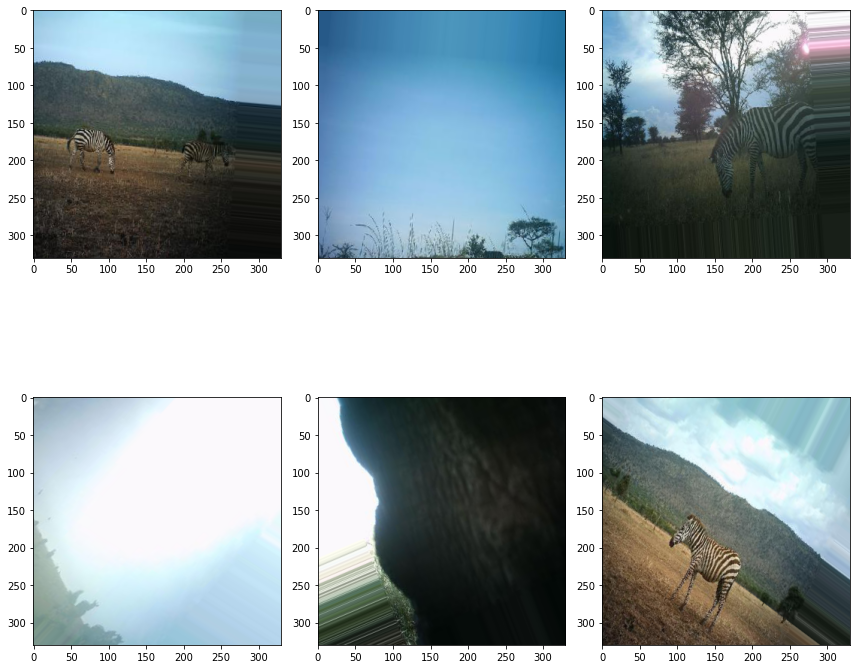

In [15]:
plt.figure(figsize=(12, 12))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    for X_batch, Y_batch in validation_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [16]:
import tensorflow_addons as tfa
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(include_top=False, input_shape=(330, 330, 3))
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
class2 = Dense(512, activation='relu')(class1)
class3 = Dense(256, activation='relu')(class2)
output = Dense(2, activation='softmax')(class3)
# define new model
model = Model(inputs=model.inputs, outputs=output)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

2022-08-14 11:18:59.149680: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-14 11:18:59.256593: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-14 11:18:59.257415: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-14 11:18:59.259246: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
batch_size=20
FAST_RUN = False
epochs=5 if FAST_RUN else 100
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator
)

2022-08-14 11:19:05.125372: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-08-14 11:19:11.818303: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


394/394 [==============================] - 490s 1s/step - loss: 1.4926 - acc: 0.7587 - val_loss: 0.8246 - val_acc: 0.5089
Epoch 2/100
394/394 [==============================] - 424s 1s/step - loss: 0.2987 - acc: 0.8731 - val_loss: 0.6010 - val_acc: 0.7191
Epoch 3/100
394/394 [==============================] - 423s 1s/step - loss: 0.2569 - acc: 0.9047 - val_loss: 3.6046 - val_acc: 0.6490
Epoch 4/100
394/394 [==============================] - 425s 1s/step - loss: 0.2292 - acc: 0.9130 - val_loss: 0.2109 - val_acc: 0.9235
Epoch 5/100
394/394 [==============================] - 422s 1s/step - loss: 0.1560 - acc: 0.9428 - val_loss: 0.3558 - val_acc: 0.8670
Epoch 6/100
394/394 [==============================] - 422s 1s/step - loss: 0.1647 - acc: 0.9375 - val_loss: 0.5466 - val_acc: 0.8006
Epoch 7/100
379/394 [===========================>..] - ETA: 14s - loss: 0.2137 - acc: 0.9264

In [ ]:
p=[]
from PIL import Image
for i in test:
    img = np.array(Image.open(i).resize((330,330))).reshape((1, 330, 330 , 3))
    out = model(img)
#     print(out)
#     print(tf.get_static_value(tf.math.argmax(out, axis=1)))
    p.append(tf.get_static_value(tf.math.argmax(out, axis=1)))

In [ ]:
tf.get_static_value(tf.math.argmax(out, axis=1))

In [ ]:
len(id_)

In [ ]:
p=[i[0] for i in p]

In [ ]:
submission=pd.DataFrame({"id":id_,"label":p})
submission.to_csv("sub1.csv", index=False)